<font size = 8 color ='336EFF'>Logistic Regression</font>

In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Create Dataset

In [3]:
# 'x' is the training data
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
x = x.reshape(-1,1)

In [8]:
# 'y' are the labels
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [9]:
# we use 'random_state' to 
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(x, y)

LogisticRegression(random_state=0, solver='liblinear')

In [10]:
print(model.classes_) # Number of classes
print(model.intercept_) # Intercept in x axis
print(model.coef_) # Slope

[0 1]
[-1.04608067]
[[0.51491375]]


Evaluate the Model

In [1]:
model.predict_proba(x)

NameError: name 'model' is not defined

Plot the probability

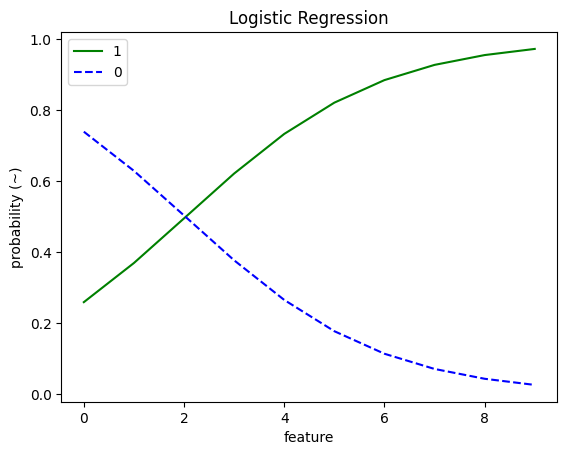

In [16]:
# In this case y_pred is a probability

y_pred = model.predict_proba(x)

plt.plot(x,y_pred[:,1], 'g-')
plt.plot(x,y_pred[:,0],'b--')
plt.xlabel("feature")
plt.ylabel("probability (~)")
plt.title("Logistic Regression")
plt.legend(["1","0"])

# This plot follows the sigmund function : It represents a probability

Decision boundary when threshold is a probability of 0.5


In [17]:
decisionBoundary = (np.log(0.5/(1-0.5)) - model.intercept_) / model.coef_
print("decision boundary:", decisionBoundary[0,0])

decision boundary: 2.0315648542136064


Predict new points above and below the threshold

In [18]:
p1 = model.predict([[1.9]])
p2 = model.predict([[2.1]])
print('P1 = ',p1,' P2 = ',p2)

P1 =  [0]  P2 =  [1]


Confussion Matrix

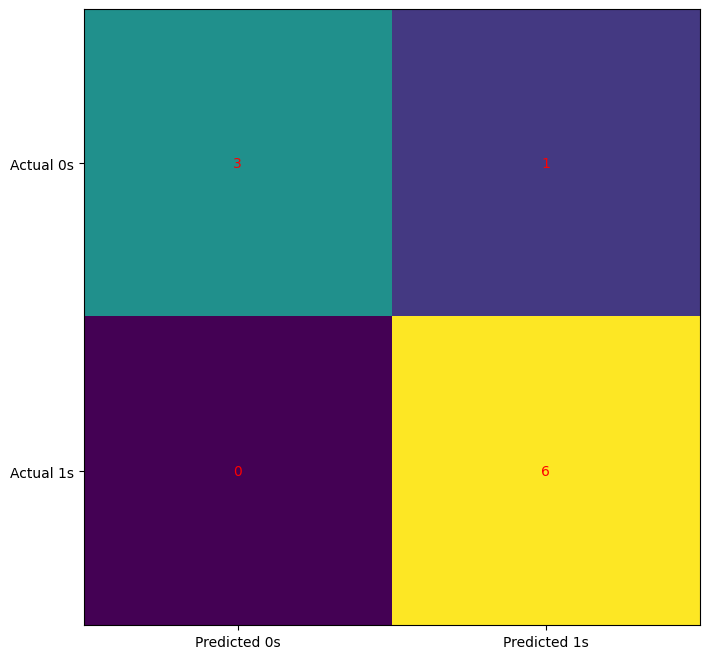

In [19]:
cm = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

Classification Report

In [20]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



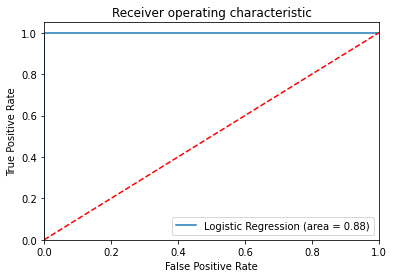

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y, model.predict(x))
fpr, tpr, thresholds = roc_curve(y, model.predict_proba(x)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

<font size='20' color='336EFF'> Logistic Regression Digits</font>

Softmax regression (multiclass logistic regression)


In [33]:
from sklearn import datasets, linear_model, metrics

# load the digit dataset
digits = datasets.load_digits()

# defining feature matrix(X) and response vector(y)
X = digits.data
y = digits.target

# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=1)

# create logistic regression object
reg = linear_model.LogisticRegression()

# train the model using the training sets
reg.fit(X_train, y_train)

# making predictions on the testing set
y_pred = reg.predict(X_test)

# comparing actual response values (y_test) with predicted response values (y_pred)
print("Logistic Regression model accuracy(in %):",
metrics.accuracy_score(y_test, y_pred)*100)

Logistic Regression model accuracy(in %): 96.52294853963839


/Users/fernankiwi/.pyenv/versions/3.11.0/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix

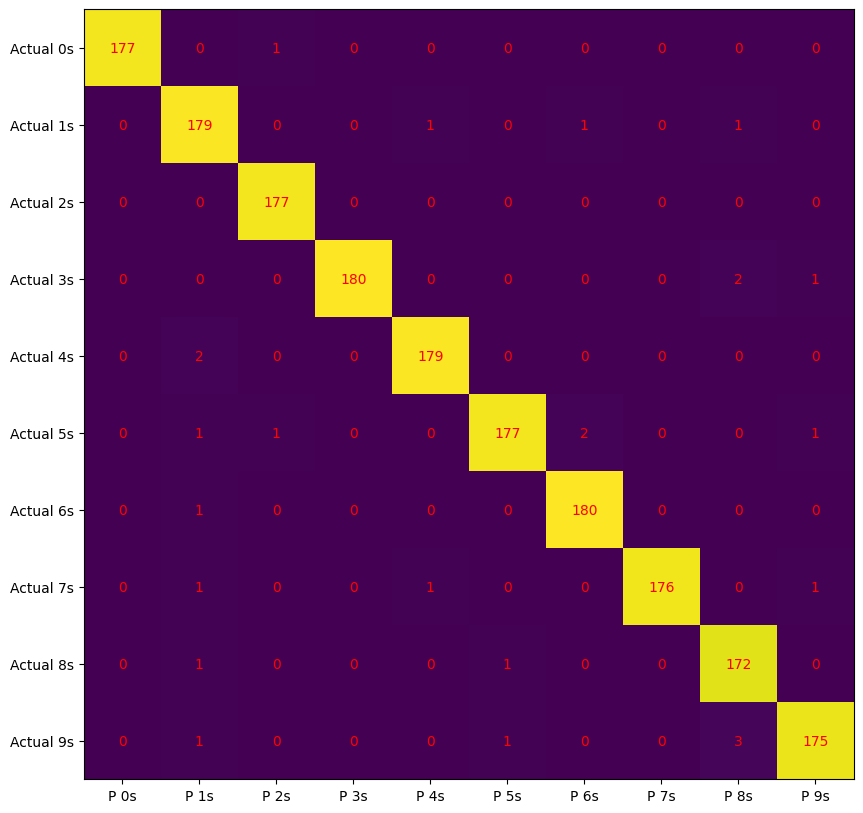

In [34]:
# Remember 'y' is 
cm = confusion_matrix(y, reg.predict(X))
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9), ticklabels=('P 0s', 'P 1s', 'P 2s', 'P 3s', 'P 4s', 'P 5s', 'P 6s', 'P 7s', 'P 8s', 'P 9s'))
ax.yaxis.set(ticks=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9), ticklabels=('Actual 0s', 'Actual 1s', 'Actual 2s', 'Actual 3s', 'Actual 4s', 'Actual 5s', 'Actual 6s', 'Actual 7s', 'Actual 8s', 'Actual 9s'))
ax.set_ylim(9.5, -0.5)
for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()